In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

## Exercise 1

#### 1. Matplotlib resolution

In [2]:
data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


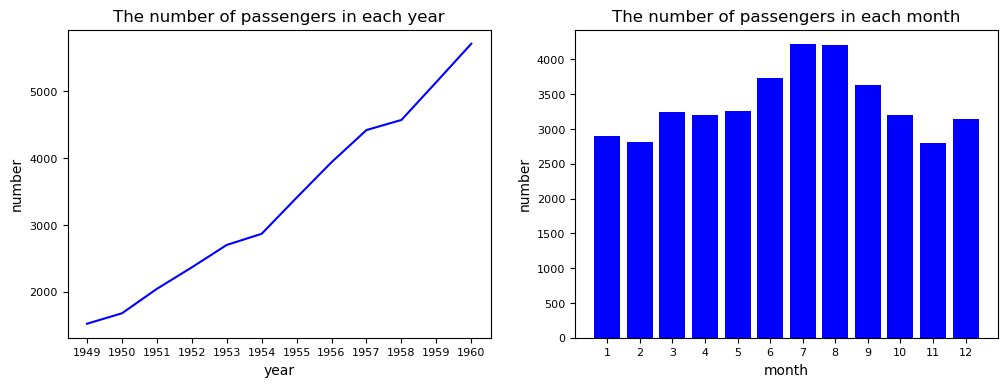

In [3]:
#数据准备，分别按年、月聚合passengers个数
y1 = data['passengers'].groupby(data['year']).sum()
y2 = data['passengers'].groupby(data['month']).sum()
y2.index = [1,2,3,4,5,6,7,8,9,10,11,12] #将index从月份改为数字

#使用subplots分块作图
fig, axes = plt.subplots(1, 2, figsize = (12,4))

#图1
axes[0].plot(y1.keys(),y1,color = 'Blue')
axes[0].set_title('The number of passengers in each year')
axes[0].set_xlabel('year')
axes[0].set_ylabel('number')
axes[0].set_xticks(y1.keys())
axes[0].tick_params(labelsize = 8)

#图2
axes[1].bar(y2.keys(),y2,color = 'Blue')
axes[1].set_title('The number of passengers in each month')
axes[1].set_xlabel('month')
axes[1].set_ylabel('number')
axes[1].set_xticks(y2.keys())
axes[1].tick_params(labelsize = 8)

plt.show()

#### 2. Seaborn resolution

In [4]:
#dir(sns)

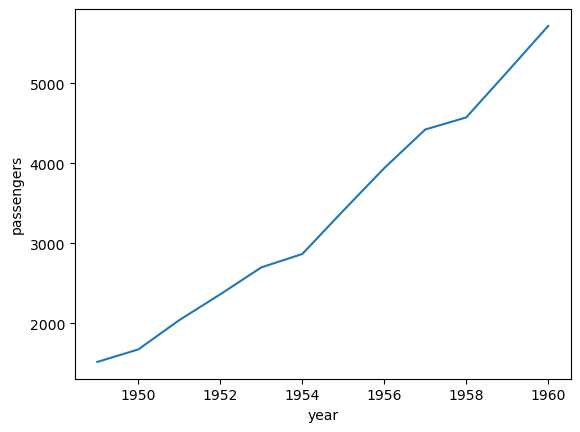

In [5]:
#数据准备，按年聚合passengers个数
y1 = data['passengers'].groupby(data['year']).sum()

sns.lineplot(data = y1)
plt.show()

<Axes: xlabel='month', ylabel='passengers'>

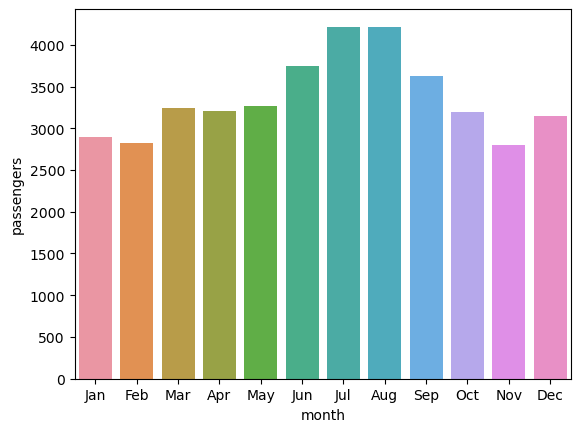

In [6]:
#数据准备，按月聚合passengers个数，输出为dataframe格式
y2 = data[['passengers']].groupby(data['month']).sum()
#x使用y2.index
sns.barplot(x = y2.index,y = y2['passengers'], data = y2)

## Exercise 2

#### 1. Matplotlib resolution

In [7]:
data2 = sns.load_dataset("iris")
data2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


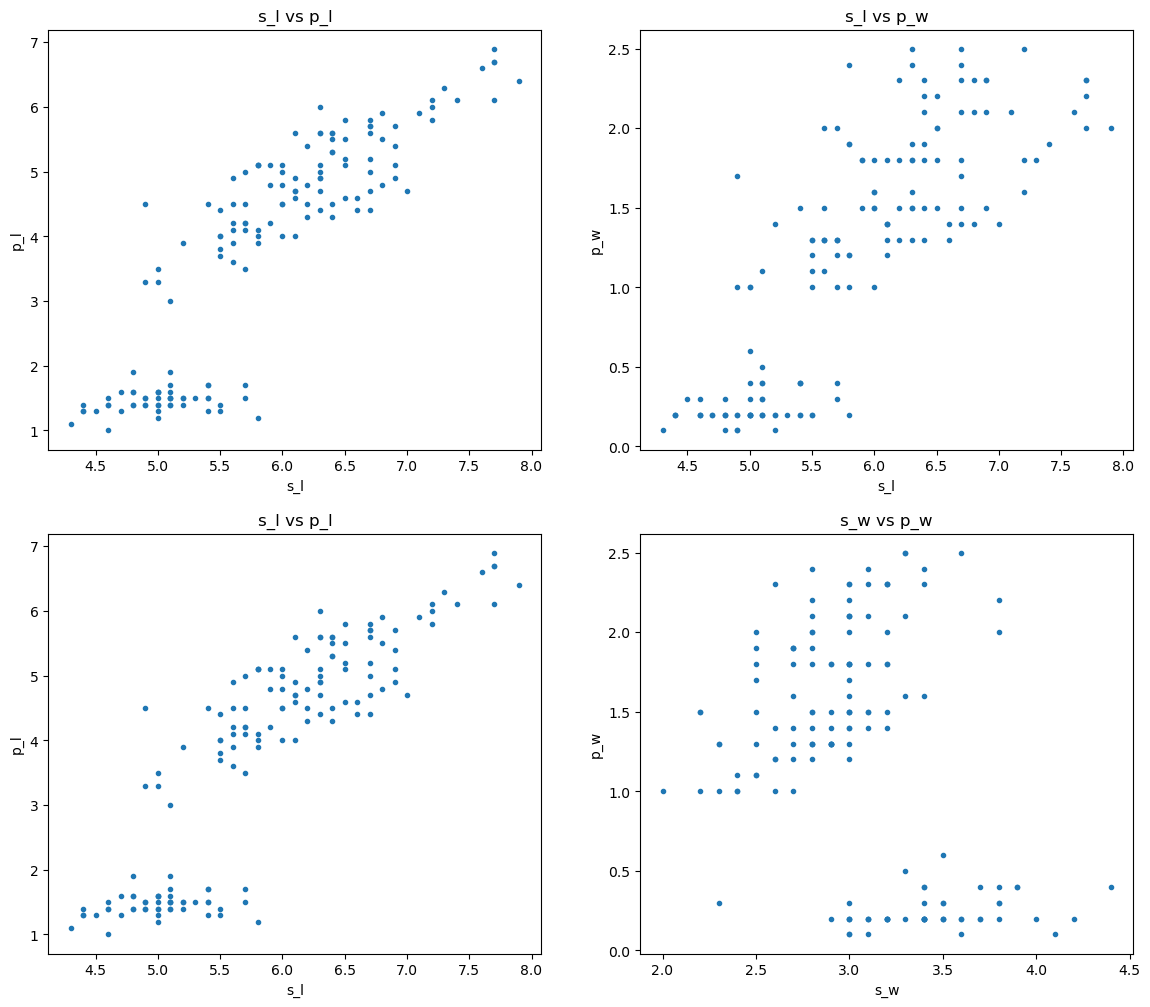

In [8]:
fig, ax = plt.subplots(2,2,figsize = (14,12))

#依次做图
ax[0,0].scatter(data2['sepal_length'], data2['petal_length'],marker = '.')
ax[0,0].set_title('s_l vs p_l')
ax[0,0].set_xlabel('s_l')
ax[0,0].set_ylabel('p_l')

ax[0,1].scatter(data2['sepal_length'], data2['petal_width'],marker = '.')
ax[0,1].set_title('s_l vs p_w')
ax[0,1].set_xlabel('s_l')
ax[0,1].set_ylabel('p_w')

ax[1,0].scatter(data2['sepal_length'], data2['petal_length'],marker = '.')
ax[1,0].set_title('s_l vs p_l')
ax[1,0].set_xlabel('s_l')
ax[1,0].set_ylabel('p_l')

ax[1,1].scatter(data2['sepal_width'], data2['petal_width'],marker = '.')
ax[1,1].set_title('s_w vs p_w')
ax[1,1].set_xlabel('s_w')
ax[1,1].set_ylabel('p_w')

plt.show()

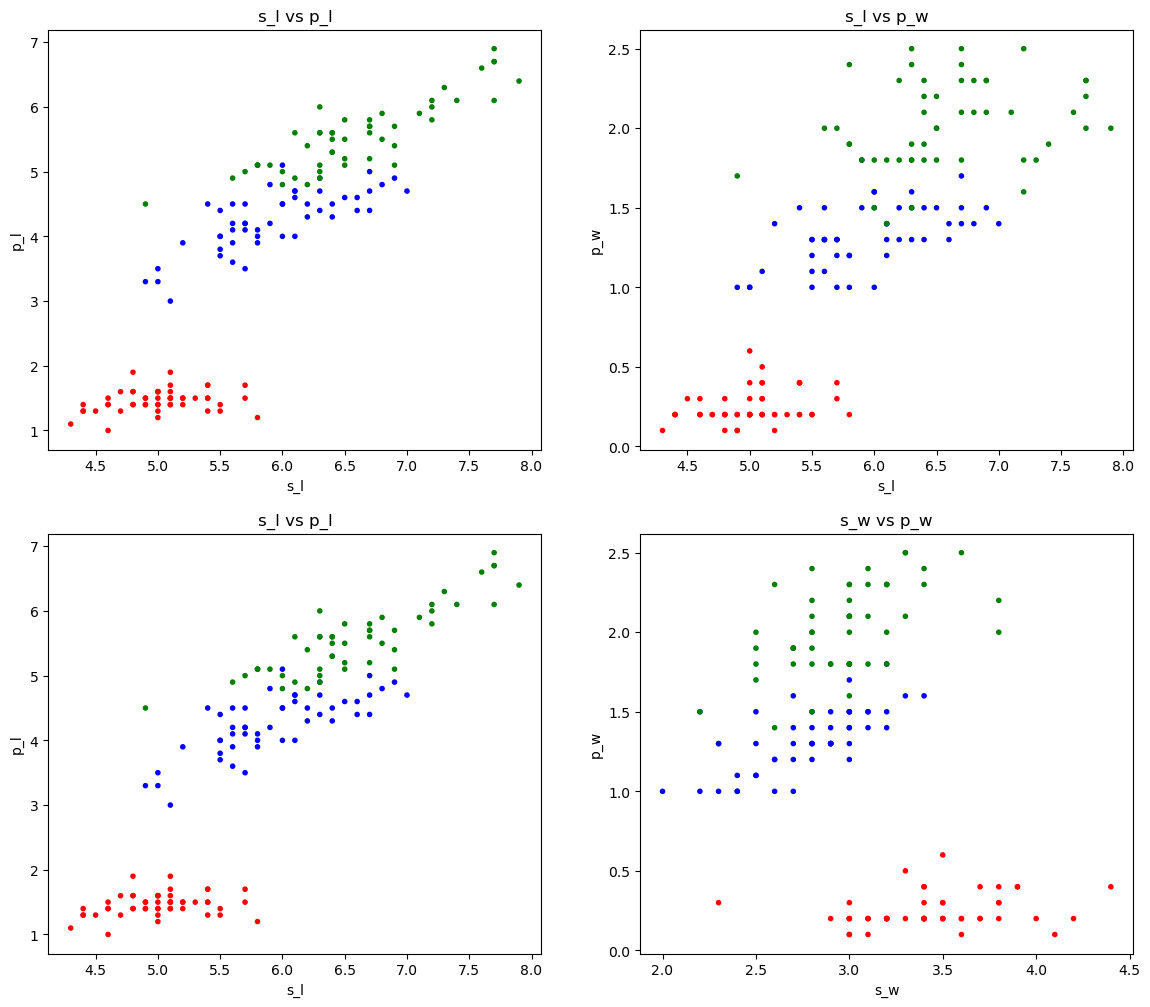

In [9]:
fig, ax = plt.subplots(2,2,figsize = (14,12))

#对不同的品种作颜色的分类
#在scatter中设定color参数时，apply一个species到color的映射
colors = {'setosa':'red', 'versicolor':'blue', 'virginica':'green'}

#依次做图
ax[0,0].scatter(data2['sepal_length'], data2['petal_length'],marker = '.',c = data2['species'].apply(lambda x:colors[x]))
ax[0,0].set_title('s_l vs p_l')
ax[0,0].set_xlabel('s_l')
ax[0,0].set_ylabel('p_l')

ax[0,1].scatter(data2['sepal_length'], data2['petal_width'],marker = '.',c = data2['species'].apply(lambda x:colors[x]))
ax[0,1].set_title('s_l vs p_w')
ax[0,1].set_xlabel('s_l')
ax[0,1].set_ylabel('p_w')

ax[1,0].scatter(data2['sepal_length'], data2['petal_length'],marker = '.',c = data2['species'].apply(lambda x:colors[x]))
ax[1,0].set_title('s_l vs p_l')
ax[1,0].set_xlabel('s_l')
ax[1,0].set_ylabel('p_l')

ax[1,1].scatter(data2['sepal_width'], data2['petal_width'],marker = '.',c = data2['species'].apply(lambda x:colors[x]))
ax[1,1].set_title('s_w vs p_w')
ax[1,1].set_xlabel('s_w')
ax[1,1].set_ylabel('p_w')

plt.show()

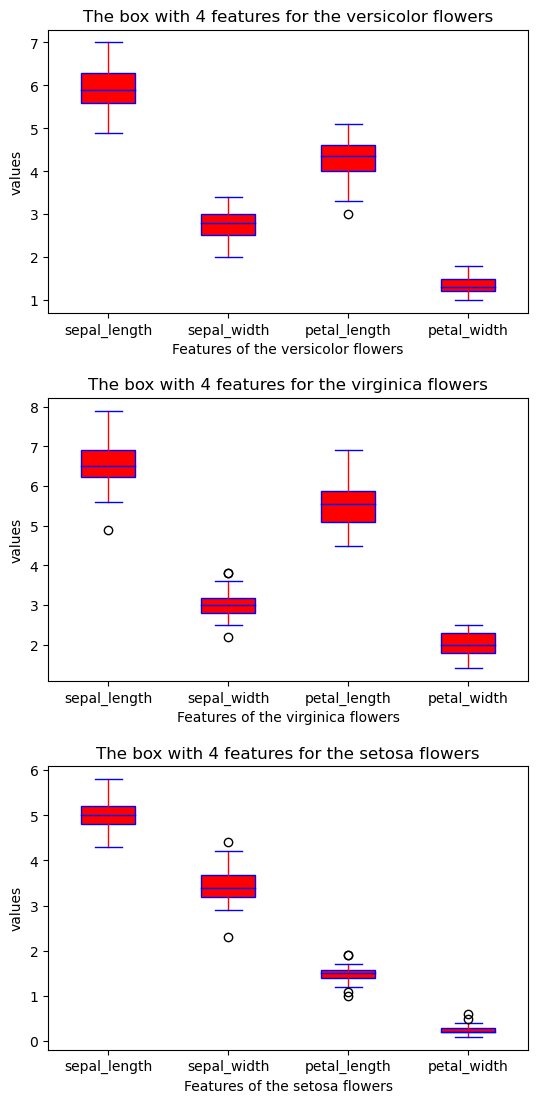

In [10]:
#创建画布
fig, ax = plt.subplots(3,1,figsize = (6,12))

i = 0
#对三个种类进行循环做图
for species in set(data2['species']):
    ax[i].boxplot(data2[data2['species'] == species].loc[:,'sepal_length':'petal_width']
               , patch_artist = True
               # 中位数线颜色
               , medianprops = {'color':'b'}
               # 箱子颜色设置，color：边框颜色，facecolor：填充颜色
               , boxprops = {'color':'b', 'facecolor':'r'}
               # 猫须颜色whisker
               , whiskerprops = {'color':'r'}
               # 猫须界限颜色whisker cap
               , capprops = {'color':'b'})
    
    ##设置title和横纵坐标等属性
    ax[i].set_title('The box with 4 features for the '+species+' flowers')
    ax[i].set_xlabel('Features of the '+species+' flowers')
    ax[i].set_ylabel('values')
    ax[i].set_xticks([1,2,3,4],['sepal_length','sepal_width','petal_length','petal_width'])
    i +=1

#调整子图间距
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.05, top=0.9, wspace=0.3, hspace=0.3)

plt.show()

#### 2. Seaborn Resolution

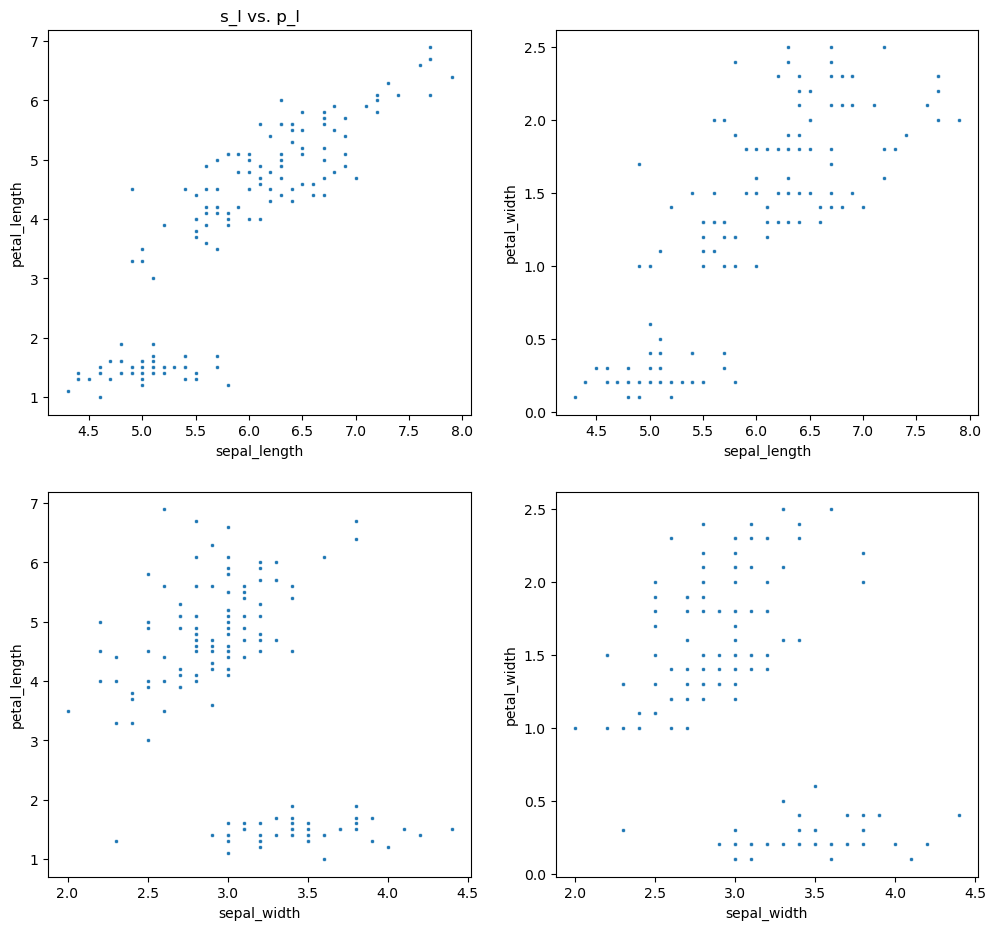

In [11]:
fig, ax = plt.subplots(2, 2, figsize = (12,11))
sns.scatterplot(x = data2['sepal_length'],y = data2['petal_length'],marker = '.',ax = ax[0,0])
ax[0,0].set_title('s_l vs. p_l')
sns.scatterplot(x = data2['sepal_length'],y = data2['petal_width'],marker = '.',ax = ax[0,1])
sns.scatterplot(x = data2['sepal_width'],y = data2['petal_length'],marker = '.',ax = ax[1,0])
sns.scatterplot(x = data2['sepal_width'],y = data2['petal_width'],marker = '.',ax = ax[1,1])
plt.show()

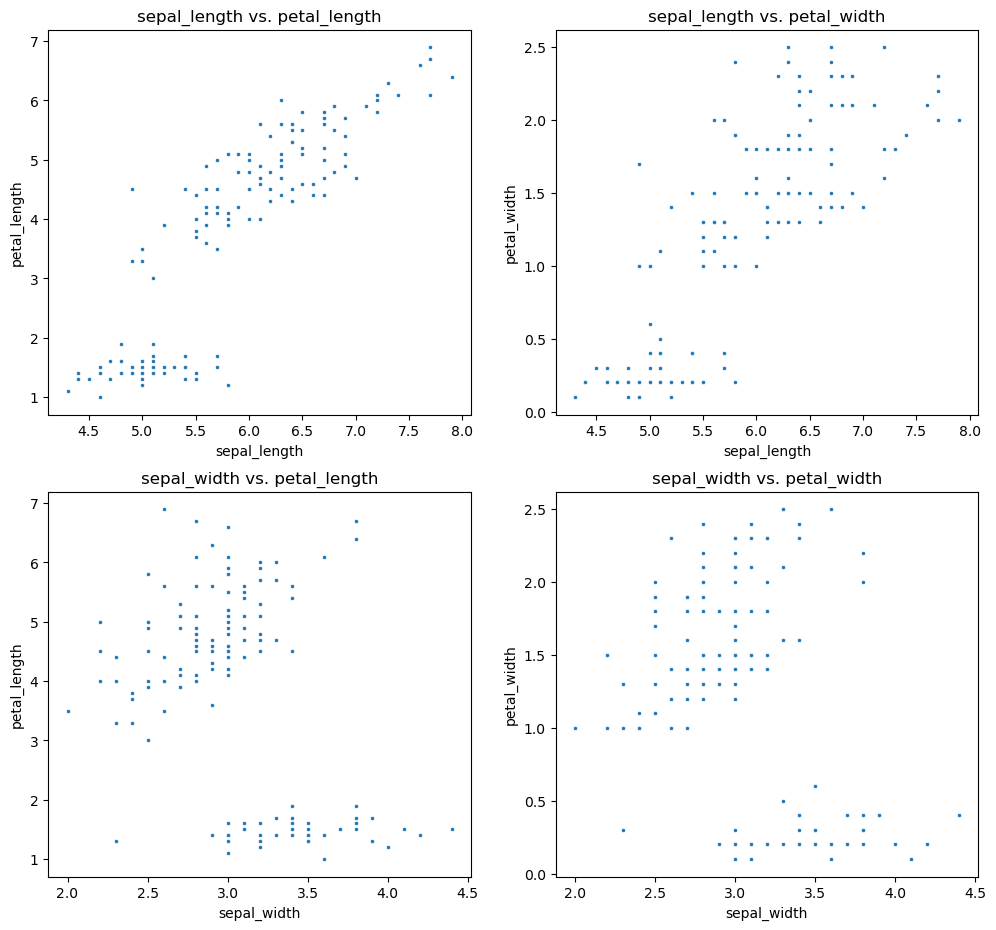

In [12]:
fig, ax = plt.subplots(2, 2, figsize = (12,11))

#懒得重复copy做图的语句，使用循环做图
i = 0
for row in ['sepal_length','sepal_width']:
    j = 0
    for col in ['petal_length','petal_width']:
        sns.scatterplot(x = data2[row],y = data2[col],marker = '.',ax = ax[i,j])
        ax[i,j].set_title(row+' vs. '+col)
        j += 1
    i += 1

plt.show()

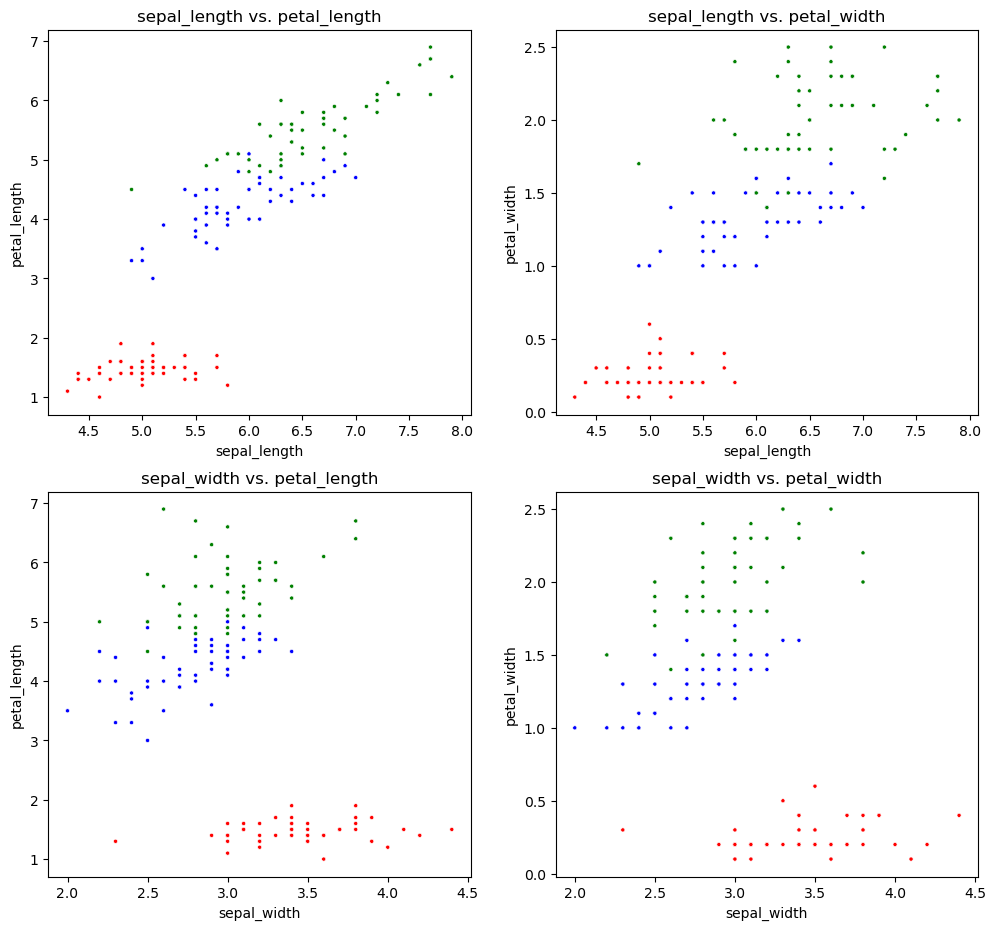

In [13]:
#对不同的品种作颜色的分类
#在scatter中设定color参数时，apply一个species到color的映射
colors = {'setosa':'red', 'versicolor':'blue', 'virginica':'green'}

fig, ax = plt.subplots(2, 2, figsize = (12,11))

i = 0
for row in ['sepal_length','sepal_width']:
    j = 0
    for col in ['petal_length','petal_width']:
        sns.scatterplot(x = data2[row],y = data2[col],marker = '.',color = data2['species'].apply(lambda x:colors[x]),ax = ax[i,j])
        ax[i,j].set_title(row+' vs. '+col)
        j += 1
    i += 1

plt.show()

<Axes: >

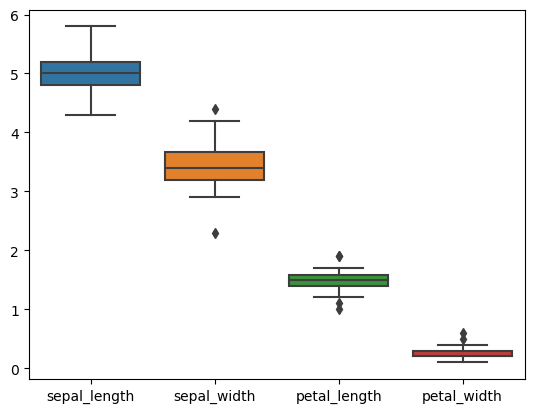

In [14]:
sns.boxplot(data = data2[data2['species'] == species].loc[:,'sepal_length':'petal_width'])

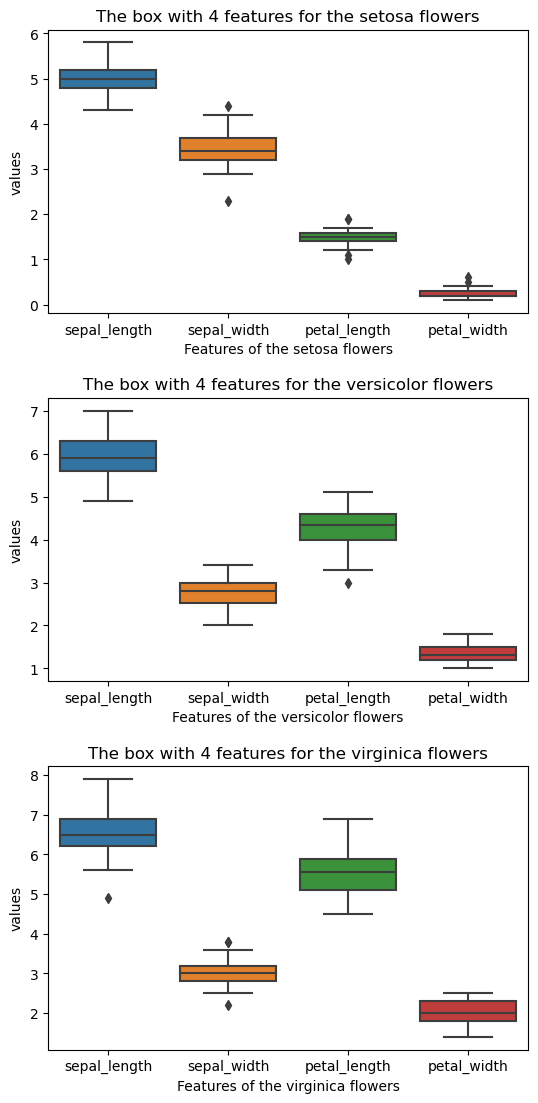

In [15]:
#创建画布
fig, ax = plt.subplots(3,1,figsize = (6,12))

i = 0
#对三个种类进行循环做图
for species in sorted(set(data2['species'])):
    sns.boxplot(data = data2[data2['species'] == species].loc[:,'sepal_length':'petal_width'],ax = ax[i])
    
    ##设置title和横纵坐标等属性
    ax[i].set_title('The box with 4 features for the '+species+' flowers')
    ax[i].set_xlabel('Features of the '+species+' flowers')
    ax[i].set_ylabel('values')
    ax[i].set_xticks([0,1,2,3],['sepal_length','sepal_width','petal_length','petal_width'])
    i +=1

#调整子图间距
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.05, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

##  Exercise 3

#### 1. Matplotlib resolution

In [16]:
data3 = sns.load_dataset("tips")
data3.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table

#线性回归，获得拟合数据
x = data3.total_bill
y = data3.tip
regr = sm.OLS(y, x) # 普通最小二乘模型，ordinary least square model
res = regr.fit()
st, data, ss2 = summary_table(res, alpha=0.05) # 置信水平alpha=5%，st数据汇总，data数据详情，ss2数据列名
fitted_values = data[:,2]

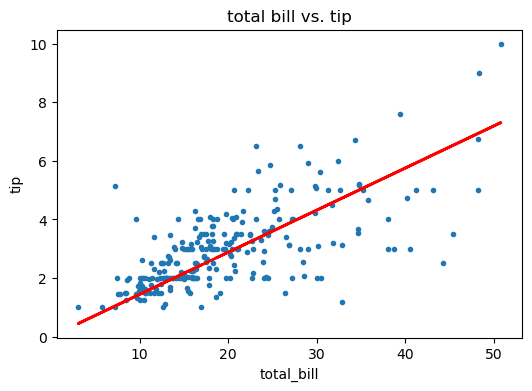

In [18]:
plt.figure(figsize=(6,4))
plt.scatter(data3['total_bill'],data3['tip'],marker='.')
plt.plot(data3.total_bill,fitted_values,lw = 2,color = 'r',alpha = 1)
plt.title('total bill vs. tip')
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.show()

#### 可以看出total_bill和tip有明显的正相关关系

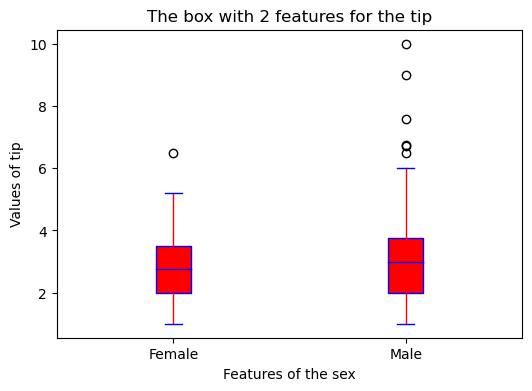

In [19]:
plt.figure(figsize=(6,4))
plt.boxplot([data3[data3['sex'] == 'Female']['tip'],data3[data3['sex'] == 'Male']['tip']]
            , patch_artist = True
            , medianprops = {'color':'b'}
            , boxprops = {'color':'b', 'facecolor':'r'}
            , whiskerprops = {'color':'r'}
            , capprops = {'color':'b'})
plt.xticks([1,2],['Female','Male'])
plt.title('The box with 2 features for the tip')
plt.xlabel('Features of the sex')
plt.ylabel('Values of tip')

plt.show()

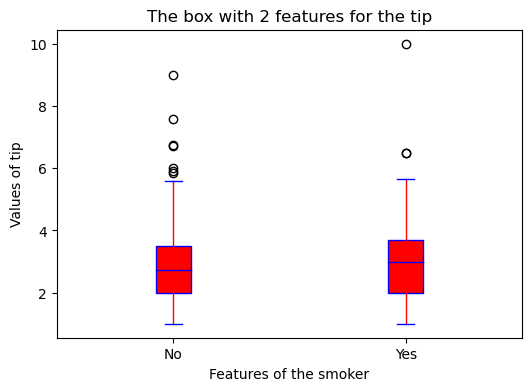

In [20]:
plt.figure(figsize=(6,4))
plt.boxplot([data3[data3['smoker'] == 'No']['tip'],data3[data3['smoker'] == 'Yes']['tip']]
            , patch_artist = True
            , medianprops = {'color':'b'}
            , boxprops = {'color':'b', 'facecolor':'r'}
            , whiskerprops = {'color':'r'}
            , capprops = {'color':'b'})
plt.xticks([1,2],['No','Yes'])
plt.title('The box with 2 features for the tip')
plt.xlabel('Features of the smoker')
plt.ylabel('Values of tip')
plt.show()

In [21]:
#对数据中的day去重
set(data3.day)

{'Fri', 'Sat', 'Sun', 'Thur'}

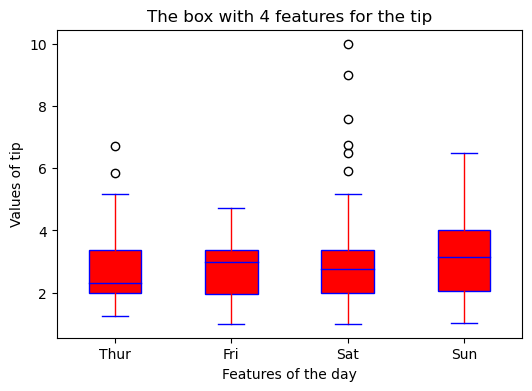

In [22]:
plt.figure(figsize=(6,4))
plt.boxplot([data3[data3['day'] == 'Thur']['tip']
            , data3[data3['day'] == 'Fri']['tip']
            , data3[data3['day'] == 'Sat']['tip']
            , data3[data3['day'] == 'Sun']['tip']]
            , patch_artist = True
            , medianprops = {'color':'b'}
            , boxprops = {'color':'b', 'facecolor':'r'}
            , whiskerprops = {'color':'r'}
            , capprops = {'color':'b'})
plt.xticks([1,2,3,4],['Thur','Fri','Sat','Sun'])
plt.title('The box with 4 features for the tip')
plt.xlabel('Features of the day')
plt.ylabel('Values of tip')
plt.show()

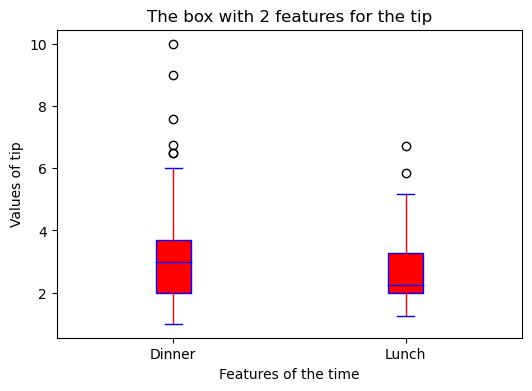

In [23]:
plt.figure(figsize=(6,4))
plt.boxplot([data3[data3['time'] == 'Dinner']['tip'],data3[data3['time'] == 'Lunch']['tip']]
            , patch_artist = True
            , medianprops = {'color':'b'}
            , boxprops = {'color':'b', 'facecolor':'r'}
            , whiskerprops = {'color':'r'}
            , capprops = {'color':'b'})
plt.xticks([1,2],['Dinner','Lunch'])
plt.title('The box with 2 features for the tip')
plt.xlabel('Features of the time')
plt.ylabel('Values of tip')
plt.show()

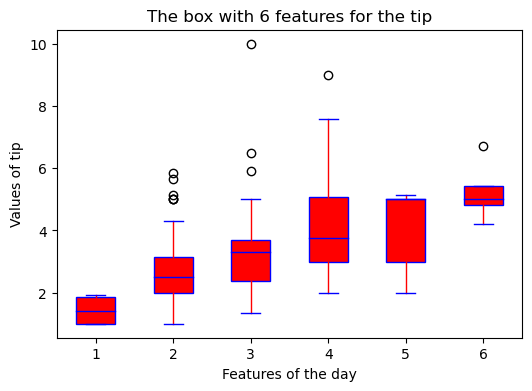

In [24]:
#此方案时用于未知要作多少个boxplot的通用情形

df = [] #创建一个空list，用于放置所用来生成boxplot的数据
l = len(set(data3['size'])) #对size字段下的值去重，统计唯一值的个数

#准备用来作图的数据
for i in sorted(set(data3['size'])): #sorted用于保证顺序
    df1 = data3[data3['size'] == i]['tip']
    df.append(df1)

plt.figure(figsize=(6,4))
plt.boxplot(df
            , patch_artist = True
            , medianprops = {'color':'b'}
            , boxprops = {'color':'b', 'facecolor':'r'}
            , whiskerprops = {'color':'r'}
            , capprops = {'color':'b'})
#按顺序设定x轴坐标
plt.xticks(range(1,l+1),sorted(set(data3['size'])))
plt.title('The box with '+str(l)+' features for the tip')
plt.xlabel('Features of the day')
plt.ylabel('Values of tip')
plt.show()

In [25]:
#定义绘制统计柱状图的函数
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 设置每一组柱状图的宽度
    total_width = 0.8
    # 设置每一个柱状图的宽度
    ind_width = total_width / len(y_data_list)
    # 计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)

    # 分别绘制每一个柱状图
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.bar(x_data + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')

In [26]:
#用crosstab生成列联表，聚合模式为均值
c_tab = pd.crosstab(index = data3['sex'],columns = data3['smoker'],values = data3['tip'],aggfunc = 'mean')
c_tab

smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


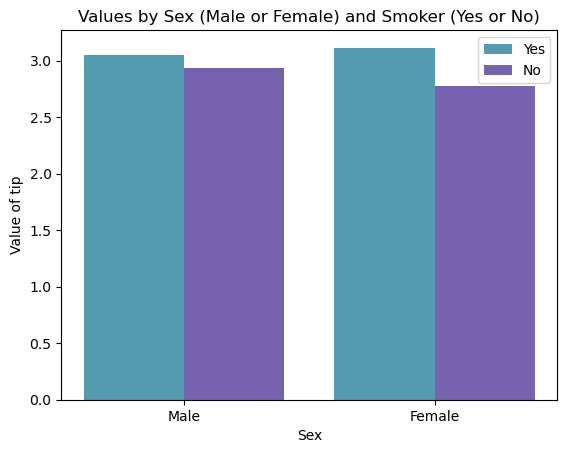

In [27]:
#使用列联表数据画柱状图
groupedbarplot(x_data = [0,1]
               , y_data_list = [c_tab.loc['Male'], c_tab.loc['Female']]
               , y_data_names = ['Yes', 'No']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Sex'
               , y_label = 'Value of tip'
               , title = 'Values by Sex (Male or Female) and Smoker (Yes or No)')
plt.xticks([0,1],['Male','Female'])
plt.show()

#### 2. Seaborn Resolution

Text(0.5, 1.0, 'total bill vs. tip')

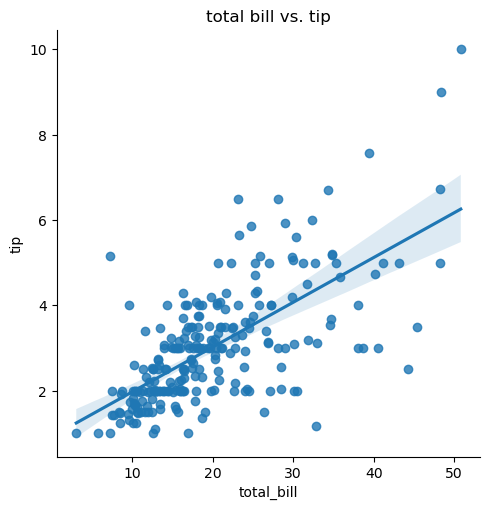

In [28]:
sns.lmplot(x = 'total_bill', y = 'tip', data = data3)
plt.title('total bill vs. tip')

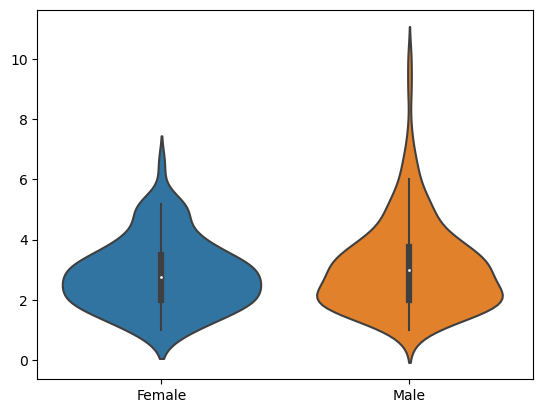

In [29]:
sns.violinplot(data = [data3[data3['sex'] == 'Female']['tip'],data3[data3['sex'] == 'Male']['tip']])
plt.xticks([0,1],['Female','Male'])
plt.show()

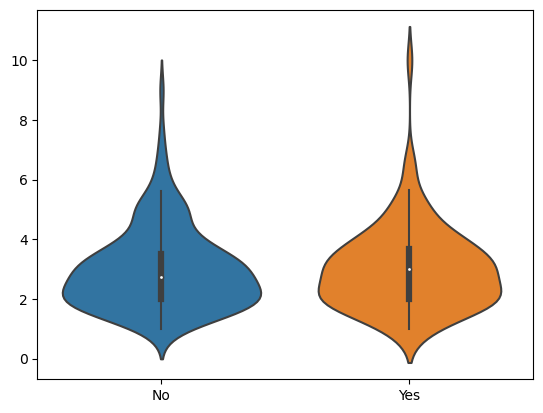

In [30]:
sns.violinplot(data = [data3[data3['smoker'] == 'No']['tip'],data3[data3['smoker'] == 'Yes']['tip']])
plt.xticks([0,1],['No','Yes'])
plt.show()

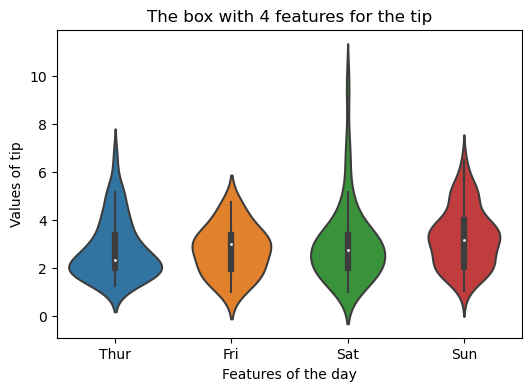

In [31]:
plt.figure(figsize=(6,4))
sns.violinplot([data3[data3['day'] == 'Thur']['tip']
            , data3[data3['day'] == 'Fri']['tip']
            , data3[data3['day'] == 'Sat']['tip']
            , data3[data3['day'] == 'Sun']['tip']])
plt.xticks([0,1,2,3],['Thur','Fri','Sat','Sun'])
plt.title('The box with 4 features for the tip')
plt.xlabel('Features of the day')
plt.ylabel('Values of tip')
plt.show()

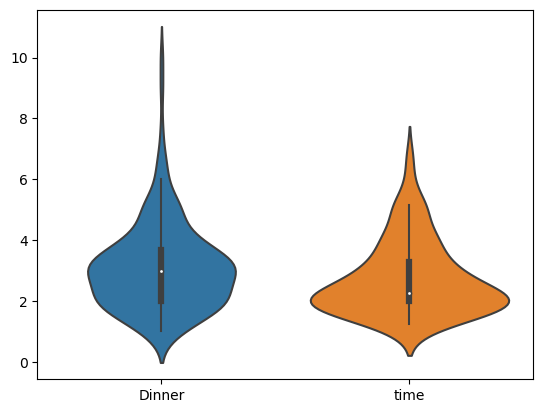

In [32]:
sns.violinplot(data = [data3[data3['time'] == 'Dinner']['tip'],data3[data3['time'] == 'Lunch']['tip']])
plt.xticks([0,1],['Dinner','time'])
plt.show()

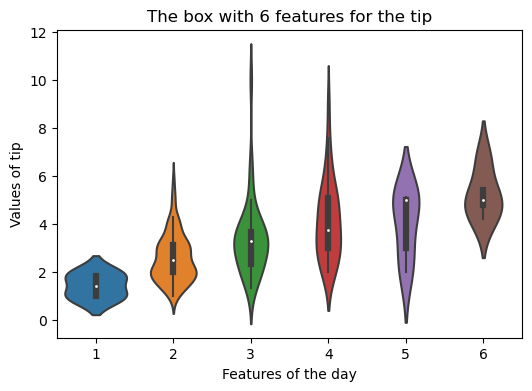

In [33]:
#此方案时用于未知要作多少个boxplot的通用情形

df = [] #创建一个空list，用于放置所用来生成boxplot的数据
l = len(set(data3['size'])) #对size字段下的值去重，统计唯一值的个数

#准备用来作图的数据
for i in sorted(set(data3['size'])): #sorted用于保证顺序
    df1 = data3[data3['size'] == i]['tip']
    df.append(df1)

plt.figure(figsize=(6,4))
sns.violinplot(df)
#按顺序设定x轴坐标
plt.xticks(range(0,l),sorted(set(data3['size'])))
plt.title('The box with '+str(l)+' features for the tip')
plt.xlabel('Features of the day')
plt.ylabel('Values of tip')
plt.show()

In [34]:
#用crosstab生成列联表，聚合模式为均值
c_tab = pd.crosstab(index = data3['sex'],columns = data3['smoker'],values = data3['tip'],aggfunc = 'mean')
c_tab

smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


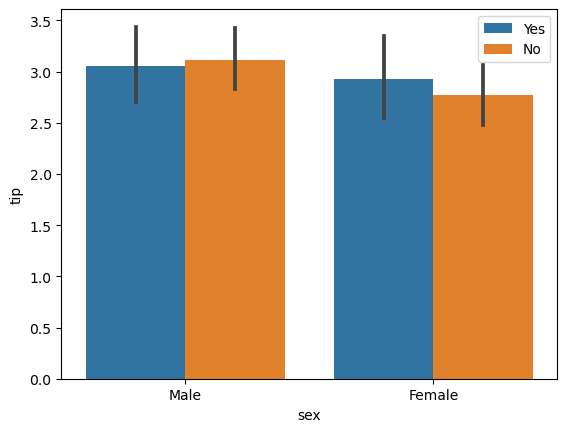

In [35]:
sns.barplot(x = 'sex',y = 'tip',hue = 'smoker',data = data3)
plt.legend(loc = 'upper right')
plt.show()

## Exercise 4

#### 1. Matplotlib resolution

In [36]:
data4 = sns.load_dataset("titanic")
data4.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [37]:
#定义生成列联表的函数
def crosstab_survived(index,columns,values):
    c_tab = pd.crosstab(index = data4[index],columns = data4[columns],values = data4[values],aggfunc = 'count')
    c_tab = c_tab.loc[:,['yes','no']] #交换两列位置
    c_tab.columns.name = ''
    c_tab.columns = ['survived','unsurvived']
    #计算新增的3列
    c_tab['total'] = c_tab['survived'] + c_tab['unsurvived']
    c_tab['survived_prop'] = c_tab['survived']/c_tab['total']
    c_tab['unsurvived_prop'] = c_tab['unsurvived']/c_tab['total']
    return c_tab

In [38]:
c_tab1 = crosstab_survived(index = 'pclass',columns = 'alive',values = 'survived')
c_tab1

,survived,unsurvived,total,survived_prop,unsurvived_prop
pclass,,,,,
1,136,80,216,0.629630,0.370370
2,87,97,184,0.472826,0.527174
3,119,372,491,0.242363,0.757637


In [39]:
#定义绘制堆积柱状图的函数
def stackedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 循环绘制堆积柱状图
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            # 采用堆积的方式，除了第一个分类，后面的分类都从前一个分类的柱状图接着画
            # 用归一化保证最终累积结果为1，下面bottom参数表示纵向从哪里开始画
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right') # 设定图例位置

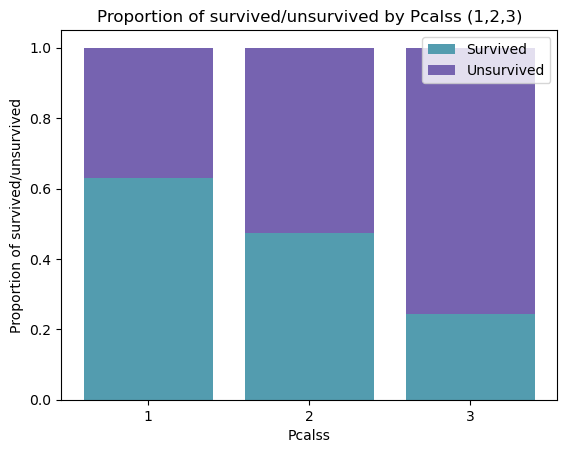

In [40]:
stackedbarplot(x_data = c_tab1.index.values
               , y_data_list = [c_tab1['survived_prop'], c_tab1['unsurvived_prop']]
               , y_data_names = ['Survived', 'Unsurvived']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Pcalss'
               , y_label = 'Proportion of survived/unsurvived'
               , title = 'Proportion of survived/unsurvived by Pcalss (1,2,3)')
plt.xticks([1,2,3],[1,2,3])
plt.show()

In [41]:
c_tab2 = crosstab_survived(index = 'sex',columns = 'alive',values = 'survived')
c_tab2

,survived,unsurvived,total,survived_prop,unsurvived_prop
sex,,,,,
female,233,81,314,0.742038,0.257962
male,109,468,577,0.188908,0.811092


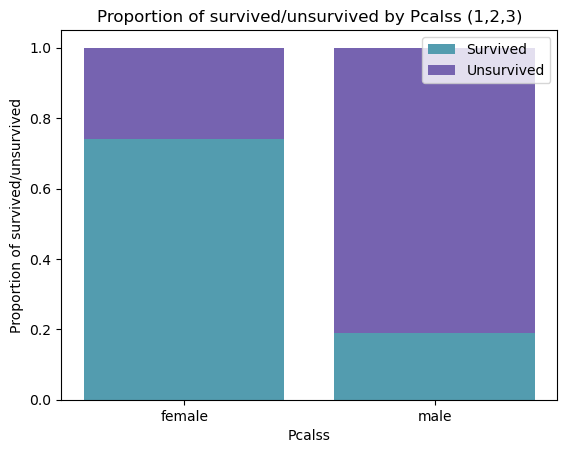

In [42]:
stackedbarplot(x_data = c_tab2.index.values
               , y_data_list = [c_tab2['survived_prop'], c_tab2['unsurvived_prop']]
               , y_data_names = ['Survived', 'Unsurvived']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Pcalss'
               , y_label = 'Proportion of survived/unsurvived'
               , title = 'Proportion of survived/unsurvived by Pcalss (1,2,3)')
plt.show()

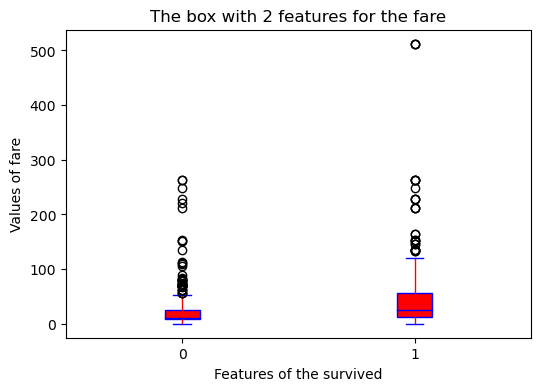

In [43]:
plt.figure(figsize = (6,4))
plt.boxplot([data4[data4['survived'] == 0]['fare'],data4[data4['survived'] == 1]['fare']]
           , patch_artist = True
            , medianprops = {'color':'b'}
            , boxprops = {'color':'b', 'facecolor':'r'}
            , whiskerprops = {'color':'r'}
            , capprops = {'color':'b'})
plt.title('The box with 2 features for the fare')
plt.xlabel('Features of the survived')
plt.ylabel('Values of fare')
plt.xticks([1,2],[0,1])
plt.show()

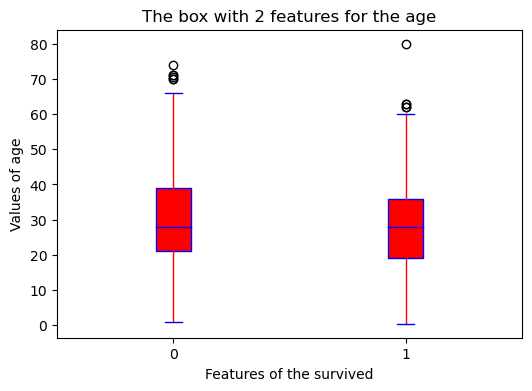

In [44]:
plt.figure(figsize = (6,4))
#首次画图失败，结果为一片空白。查询到是由于空值所导致，所以用dropna()去除所有带空值的行
plt.boxplot([data4[data4['survived'] == 0]['age'].dropna(),data4[data4['survived'] == 1]['age'].dropna()]
           , patch_artist = True
            , medianprops = {'color':'b'}
            , boxprops = {'color':'b', 'facecolor':'r'}
            , whiskerprops = {'color':'r'}
            , capprops = {'color':'b'})
plt.title('The box with 2 features for the age')
plt.xlabel('Features of the survived')
plt.ylabel('Values of age')
plt.xticks([1,2],[0,1])
plt.show()

In [45]:
#生成embarked和pclass的列联表
c_tab2 = pd.crosstab(index = data4['embarked'],columns = data4['pclass'],values = 1,aggfunc = 'count')
c_tab2

pclass,1,2,3
embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


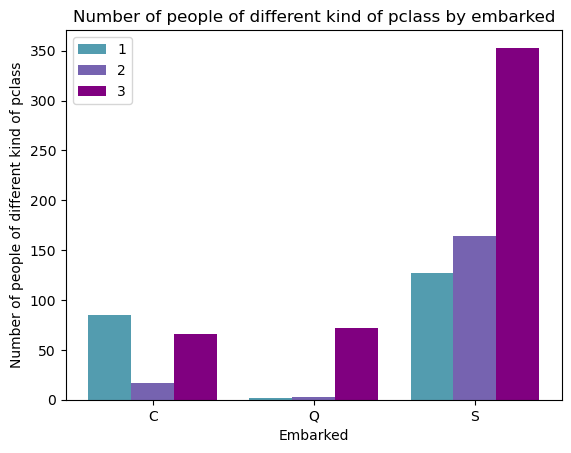

In [46]:
#使用列联表的数据作图
#此处homework里的样图有误，x轴坐标应该是embarked的值C、Q、S，图例里是pclass的值1、2、3
groupedbarplot(x_data = [0,1,2]
               , y_data_list = [c_tab2[1], c_tab2[2], c_tab2[3]]
               , y_data_names = [1,2,3]
               , colors = ['#539caf', '#7663b0', 'purple']
               , x_label = 'Embarked'
               , y_label = 'Number of people of different kind of pclass'
               , title = 'Number of people of different kind of pclass by embarked')
plt.xticks([0,1,2],['C','Q','S'])
#设置图例位置
plt.legend(loc = 'upper left')
plt.show()

In [47]:
#统计sibsp值的频数
data4['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

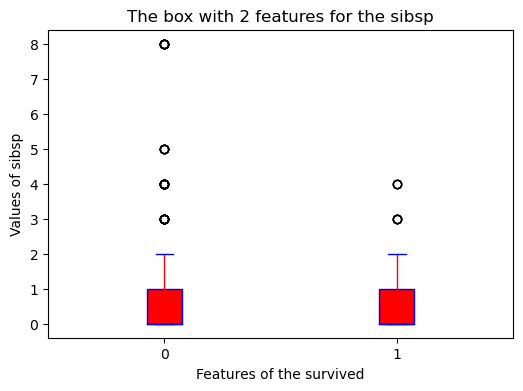

In [48]:
plt.figure(figsize = (6,4))
plt.boxplot([data4[data4['survived'] == 0]['sibsp'],data4[data4['survived'] == 1]['sibsp']]
           , patch_artist = True
            , medianprops = {'color':'b'}
            , boxprops = {'color':'b', 'facecolor':'r'}
            , whiskerprops = {'color':'r'}
            , capprops = {'color':'b'})
plt.title('The box with 2 features for the sibsp')
plt.xlabel('Features of the survived')
plt.ylabel('Values of sibsp')
plt.xticks([1,2],[0,1])
plt.show()

In [49]:
#统计parch值的频数
data4['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

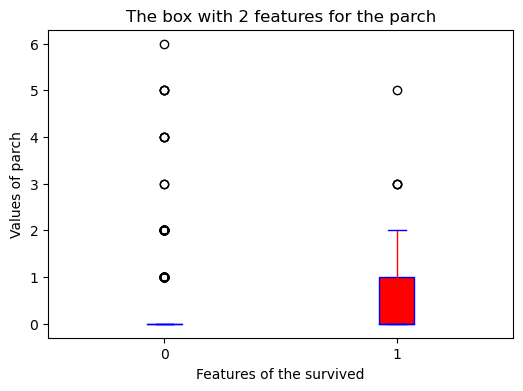

In [50]:
plt.figure(figsize = (6,4))
plt.boxplot([data4[data4['survived'] == 0]['parch'],data4[data4['survived'] == 1]['parch']]
           , patch_artist = True
            , medianprops = {'color':'b'}
            , boxprops = {'color':'b', 'facecolor':'r'}
            , whiskerprops = {'color':'r'}
            , capprops = {'color':'b'})
plt.title('The box with 2 features for the parch')
plt.xlabel('Features of the survived')
plt.ylabel('Values of parch')
plt.xticks([1,2],[0,1])
plt.show()

In [51]:
#生成survived和alone的列联表
c_tab3 = pd.crosstab(index = data4['alone'],columns = data4['survived'],values = 1,aggfunc = 'count')
c_tab3

survived,0,1
alone,,
False,175,179
True,374,163


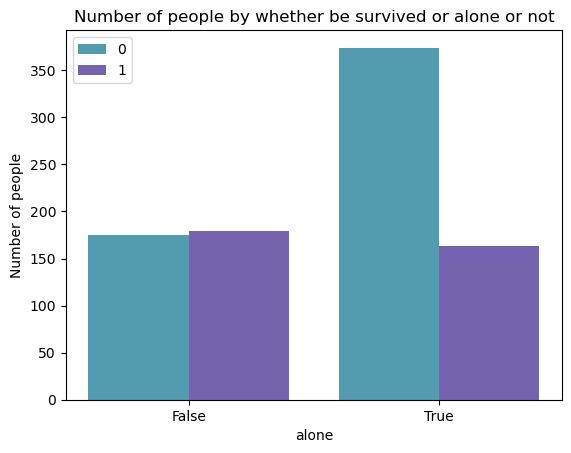

In [52]:
#使用列联表的数据作图
groupedbarplot(x_data = [0,1]
               , y_data_list = [c_tab3[0], c_tab3[1]]
               , y_data_names = ['0', '1']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'alone'
               , y_label = 'Number of people'
               , title = 'Number of people by whether be survived or alone or not')
plt.xticks([0,1],['False','True'])
#设置图例位置
plt.legend(loc = 'upper left')
plt.show()

#### 2. Seaborn Resolution

In [53]:
#先生成列联表，并计算不同pclass的存活率和死亡率
c_tab1 = crosstab_survived(index = 'pclass',columns = 'alive',values = 'survived')
c_tab1

,survived,unsurvived,total,survived_prop,unsurvived_prop
pclass,,,,,
1,136,80,216,0.629630,0.370370
2,87,97,184,0.472826,0.527174
3,119,372,491,0.242363,0.757637


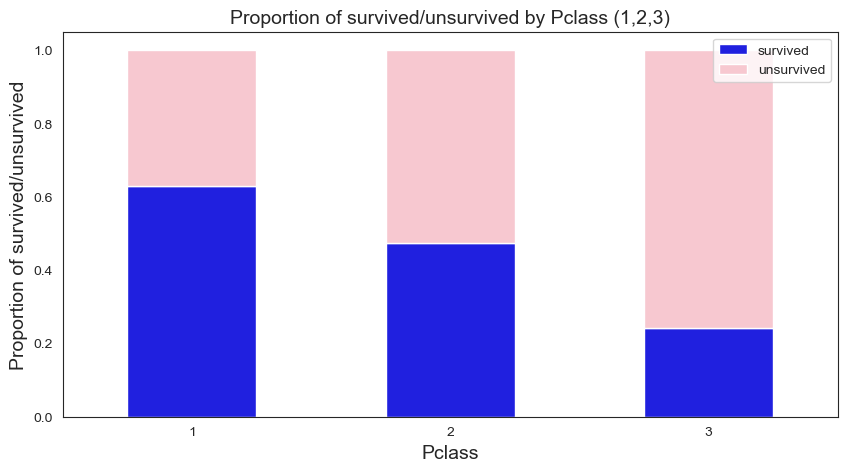

In [54]:
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 5)})

sns.barplot(x = c_tab1.index, y = c_tab1['survived_prop'],color = 'blue',label = 'survived',width = 0.5)
sns.barplot(x = c_tab1.index, y = c_tab1['unsurvived_prop'], color='pink', label = 'unsurvived', bottom = c_tab1['survived_prop'],width = 0.5)
topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
plt.legend(loc = 'upper right')

plt.title('Proportion of survived/unsurvived by Pclass (1,2,3)',fontsize = 14)
plt.xlabel('Pclass',fontsize = 14)
plt.ylabel('Proportion of survived/unsurvived',fontsize = 14)

plt.show()

In [55]:
#先生成列联表，并计算不同性别的存活率和死亡率
c_tab2 = crosstab_survived(index = 'sex',columns = 'alive',values = 'survived')
c_tab2

,survived,unsurvived,total,survived_prop,unsurvived_prop
sex,,,,,
female,233,81,314,0.742038,0.257962
male,109,468,577,0.188908,0.811092


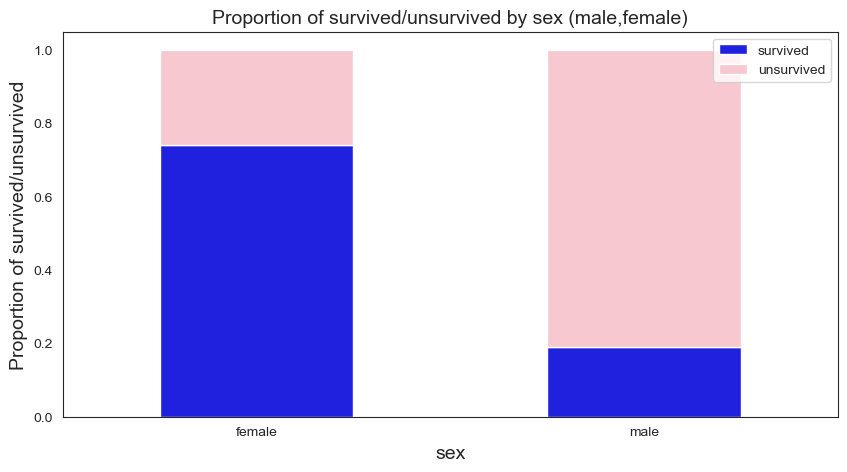

In [56]:
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 5)})

sns.barplot(x = c_tab2.index, y = c_tab2['survived_prop'],color = 'blue',label = 'survived',width = 0.5)
sns.barplot(x = c_tab2.index, y = c_tab2['unsurvived_prop'], color='pink', label = 'unsurvived', bottom = c_tab2['survived_prop'],width = 0.5)
topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
plt.legend(loc = 'upper right')

plt.title('Proportion of survived/unsurvived by sex (male,female)',fontsize = 14)
plt.xlabel('sex',fontsize = 14)
plt.ylabel('Proportion of survived/unsurvived',fontsize = 14)

plt.show()

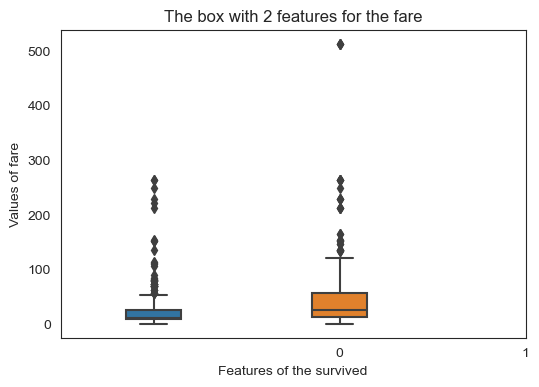

In [57]:
plt.figure(figsize = (6,4))
sns.boxplot([data4[data4['survived'] == 0]['fare'],data4[data4['survived'] == 1]['fare']],width = 0.3)
plt.title('The box with 2 features for the fare')
plt.xlabel('Features of the survived')
plt.ylabel('Values of fare')
plt.xticks([1,2],[0,1])
plt.show()

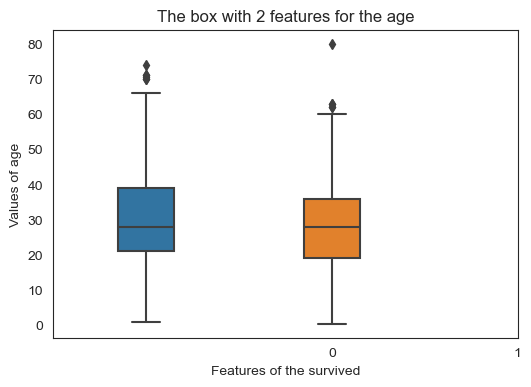

In [58]:
plt.figure(figsize = (6,4))
#首次画图失败，结果为一片空白。查询到是由于空值所导致，所以用dropna()去除所有带空值的行
sns.boxplot([data4[data4['survived'] == 0]['age'].dropna(),data4[data4['survived'] == 1]['age'].dropna()],width = 0.3)
plt.title('The box with 2 features for the age')
plt.xlabel('Features of the survived')
plt.ylabel('Values of age')
plt.xticks([1,2],[0,1])
plt.show()

In [59]:
#生成embarked和pclass的列联表
c_tab3 = pd.crosstab(index = data4['embarked'],columns = data4['pclass'],values = 1,aggfunc = 'count')
c_tab3

pclass,1,2,3
embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


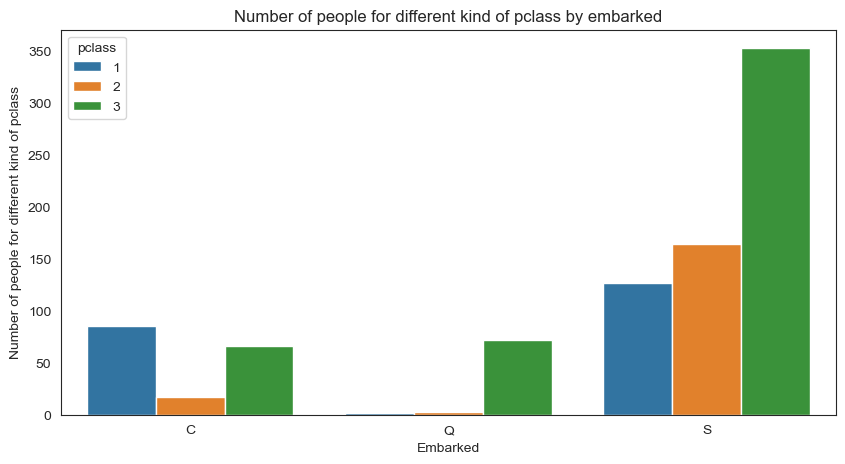

In [70]:
#新增一行常数项（全为1）用于统计人数，作图时estimator设置为sum
df = sm.add_constant(data4)
sns.barplot(x = 'embarked', y = 'const',hue = 'pclass',order = ['C','Q','S'],hue_order = [1,2,3],estimator = 'sum',data = df)
plt.title('Number of people for different kind of pclass by embarked')
plt.xlabel('Embarked')
plt.ylabel('Number of people for different kind of pclass')
plt.show()

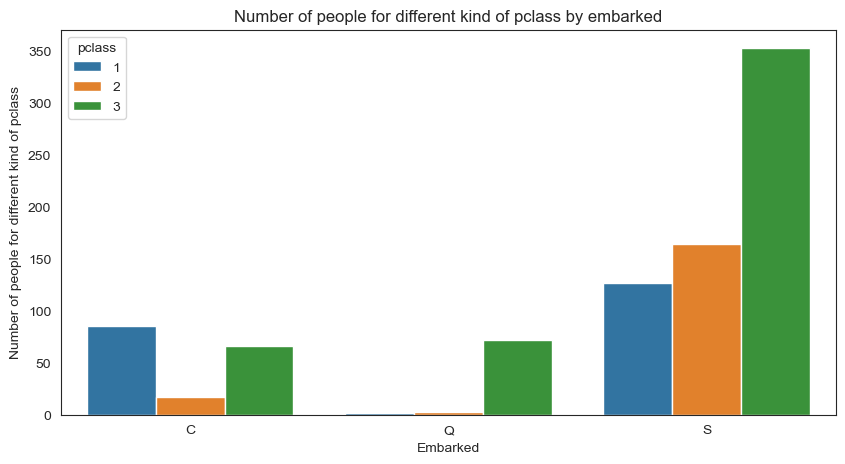

In [76]:
#方法2，直接使用sns.countplot
sns.countplot(x = 'embarked',hue = 'pclass',order = ['C','Q','S'],hue_order = [1,2,3],data = data4)
plt.title('Number of people for different kind of pclass by embarked')
plt.xlabel('Embarked')
plt.ylabel('Number of people for different kind of pclass')
plt.show()

In [61]:
#统计sibsp值的频数
data4['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

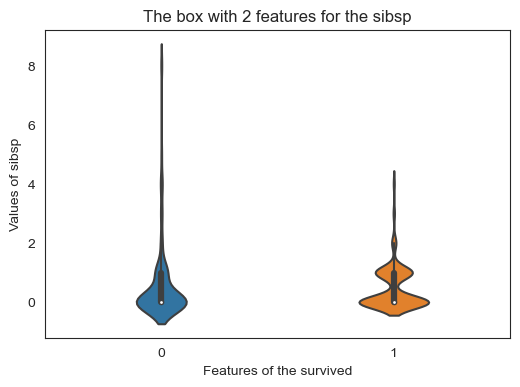

In [62]:
plt.figure(figsize = (6,4))
sns.violinplot(data = [data4[data4['survived'] == 0]['sibsp'],data4[data4['survived'] == 1]['sibsp']],width = 0.3)
plt.title('The box with 2 features for the sibsp')
plt.xlabel('Features of the survived')
plt.ylabel('Values of sibsp')
plt.xticks([0,1],[0,1])
plt.show()

In [63]:
#统计parch值的频数
data4['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

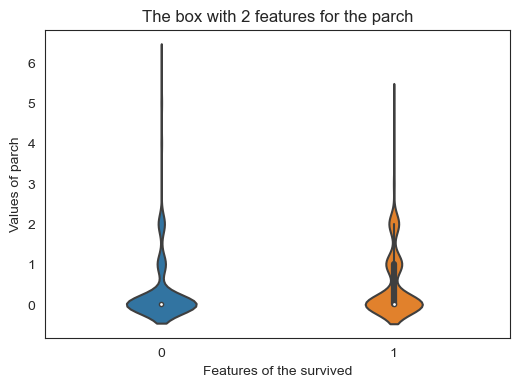

In [64]:
plt.figure(figsize = (6,4))
sns.violinplot(data = [data4[data4['survived'] == 0]['parch'],data4[data4['survived'] == 1]['parch']],width = 0.3)
plt.title('The box with 2 features for the parch')
plt.xlabel('Features of the survived')
plt.ylabel('Values of parch')
plt.xticks([0,1],[0,1])
plt.show()

In [65]:
#生成survived和alone的列联表
c_tab3 = pd.crosstab(index = data4['alone'],columns = data4['survived'],values = 1,aggfunc = 'count')
c_tab3

survived,0,1
alone,,
False,175,179
True,374,163


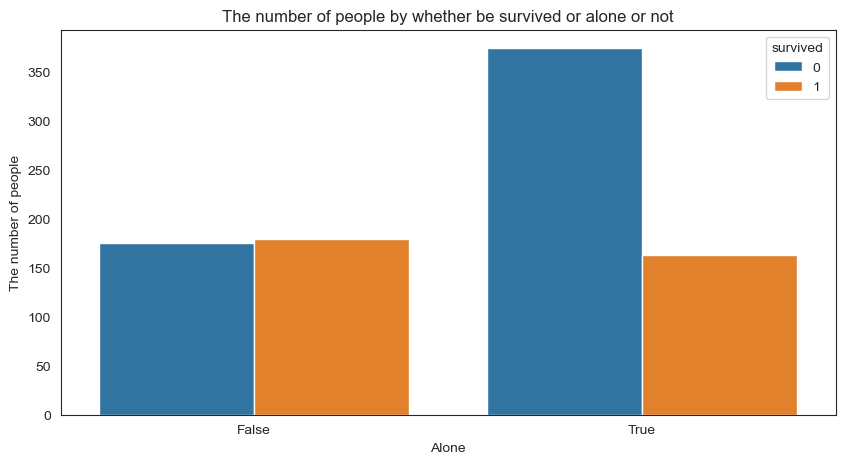

In [75]:
#使用新增了常数项的df
sns.countplot(x = 'alone',hue = 'survived',order = [False,True],hue_order = [0,1],data = data4)
plt.title('The number of people by whether be survived or alone or not')
plt.xlabel('Alone')
plt.ylabel('The number of people')
plt.show()